### Влияние вывоза капитала на экономику принимающей страны.

### The impact of the export of capital on the economy of the host country.

Useful Links: 

https://eprints.soas.ac.uk/22537/1/Banaji_Grossman_excerpt.pdf

https://www.investopedia.com/terms/c/capital-outflow.asp#:~:text=Capital%20outflow%20is%20the%20movement,of%20political%20or%20economic%20instability.

https://webarchiv.ethz.ch/vwl/down/folien/Principles_Macro_08/Lecture09.pdf

#### Definition of Capital Outflow:

Capital outflow is the movement of assets out of a country. 
Capital outflow is considered undesirable as it is often the 
result of political or economic instability. The flight of assets
occurs when foreign and domestic investors sell off their holdings 
in a particular country because of perceived weakness in the nation's 
economy and the belief that better opportunities exist abroad.

#### Money Market Chart 

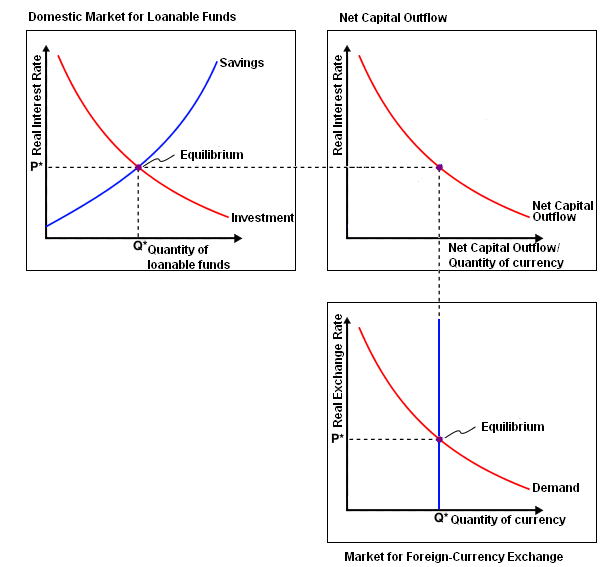

In [1]:
from IPython import display
display.Image("https://upload.wikimedia.org/wikipedia/commons/6/60/3-panel_diagram.PNG")

#### Exploring the Relationship Between Interest Rates and the Ruble Exchange Rate 

theory: as interest rates go up => ruble increases in value => negative correlation




scrape data from CBRF 
https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=3.07.2009&UniDbQuery.To=1.03.2022


Using the data from the link above instead of from this link:
https://www.cbr.ru/hd_base/KeyRate/


In [2]:
!pip3 install selenium

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import yahoofinancials
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import zoom
import numpy as np

import requests
import urllib.request
import time
from bs4 import BeautifulSoup
from selenium import webdriver

/tmp/ipykernel_77188/56641002.py:12: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


In [4]:
# get USD/RUB historical data
yf.pdr_override() 
df = pdr.get_data_yahoo("USDRUB=X", start="2009-07-01", end="2022-04-14")

[*********************100%***********************]  1 of 1 completed


In [5]:
#yield curve CBRF now
url = 'https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=3.07.2009&UniDbQuery.To=1.03.2022'   

# Connect to the URL
response = requests.get(url)

# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.text, "html.parser")
raw = soup.findAll('td',{"class":""})

index = []
vals = []

# separate index from vals in soup
def separate(raw):
    for i in range(len(raw)):
        if i % 2 == 0:
            index.append(raw[i].decode_contents())
        else:
            vals.append(raw[i].decode_contents())
            
separate(raw)


# remove comma from string and convert to float
rates = []

def removeComma(x):
    for i in range(len(vals)):
        y = float(vals[i].replace(',', "."))
        rates.append(y)
        
        
removeComma(vals)

In [6]:
# reversing data 
index=index[::-1]
rates=rates[::-1]

In [7]:
df1 = pd.DataFrame({'index': index, 'rates': rates})

In [8]:
# original array:
x = df1["rates"]

# set resample ratio:
resample_ratio = len(df) / len(x)

# resample array:
y = zoom(x, resample_ratio, order=0)

In [9]:
# sanity check
print(len(y))
print(len(df))

3332
3332


In [10]:
df1 = pd.DataFrame({'rates': y})

#### Central Bank Interest Rates

<AxesSubplot:>

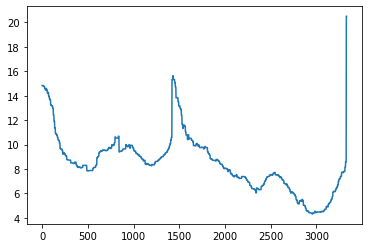

In [11]:
# Central Bank Interest Rates
df1["rates"].plot()

#### USD/RUB exchange rate

<AxesSubplot:xlabel='Date'>

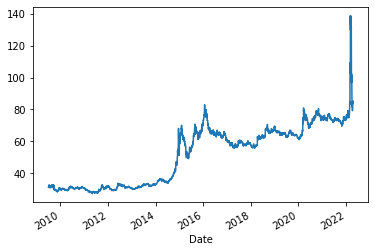

In [12]:
# drop outlier and plot
df.at["2016-01-06","Close"] = 74
df['Close'].plot()

In [13]:
df['Rates'] = df1['rates'].values

In [14]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [15]:
df

,Close,Rates
Date,,
2009-06-30,31.073999,14.840
2009-07-01,31.096300,14.840
2009-07-02,31.129000,14.840
2009-07-03,31.162001,14.840
2009-07-06,31.349001,14.840
...,...,...
2022-04-07,82.089996,8.587
2022-04-08,79.214996,20.510
2022-04-11,85.089996,20.510


In [16]:
def plot_data(data_df, normalize, log_plot, title):
    data_df = data_df.dropna()
    
    # normalize df
    if normalize == True:
        data_df = (data_df - data_df.mean()) / data_df.std()
    else:
        pass

    for column in data_df:

        ax = data_df[column].plot(figsize=(14, 10), legend=True, logy=log_plot, grid=True)

    ax.get_legend().set_bbox_to_anchor((1.3, 1))
    
    plt.title(title)

    #return data_df

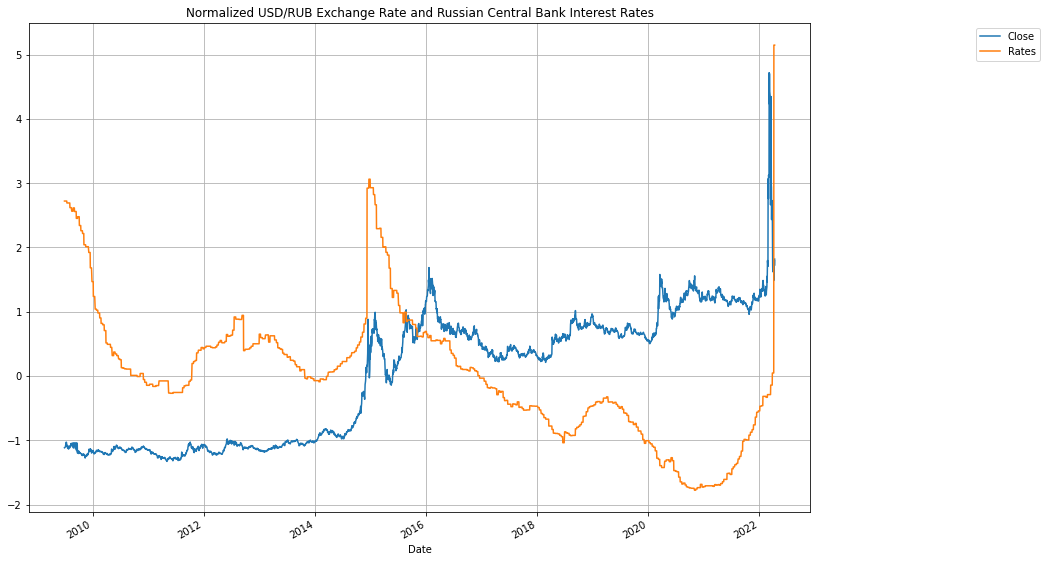

In [17]:
normalize = True
log_plot = False
title = "Normalized USD/RUB Exchange Rate and Russian Central Bank Interest Rates"

plot_data(df, normalize, log_plot,title)

In [18]:
# calculate correlation without shift
sum_corr = df.corr().sum().sort_values(ascending=True).index.values
df[sum_corr].corr()

,Close,Rates
Close,1.000000,-0.473135
Rates,-0.473135,1.000000


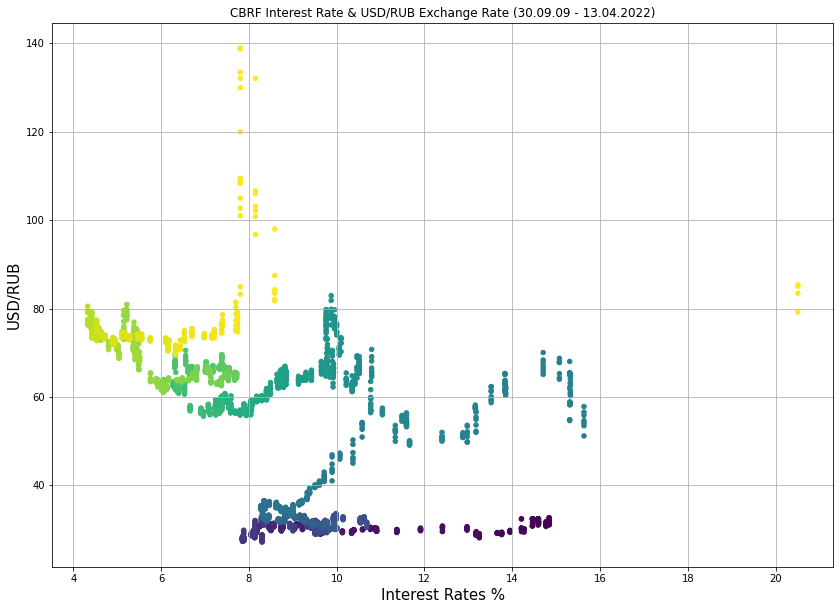

In [19]:
# plotting USD/RUB to Rates

ax = df.plot.scatter(x='Rates', y='Close', c=df.index, cmap='viridis', figsize=(14,10))

ax.set_xlabel('Interest Rates %', fontsize=15)
ax.set_ylabel("USD/RUB", fontsize=15)
ax.set_title('CBRF Interest Rate & USD/RUB Exchange Rate (30.09.09 - 13.04.2022)')

ax.grid(True)

plt.savefig("correlation.png")

In [20]:
# calculate correlation without shift
sum_corr = df.corr().sum().sort_values(ascending=True).index.values
df[sum_corr].corr()

,Close,Rates
Close,1.000000,-0.473135
Rates,-0.473135,1.000000


In [21]:
# Values for 2009 - 2021

In [22]:
df.describe()

,Close,Rates
count,3332.000000,3332.000000
mean,51.705262,8.476861
std,18.491695,2.337610
min,27.154900,4.326000
25%,31.428625,7.135000
50%,57.717001,8.400000
75%,65.904224,9.650000
max,138.965103,20.510000


In [23]:
# Let's take a closer look at the correlation from 2017 - 2021
df = df.iloc[2000:3000]

In [24]:
df.head()

,Close,Rates
Date,,
2017-03-02,58.236301,8.07
2017-03-03,58.719799,8.07
2017-03-06,58.187000,8.07
2017-03-07,58.233299,8.07
2017-03-08,58.136501,8.07


In [25]:
df.describe()

,Close,Rates
count,1000.000000,1000.000000
mean,64.761683,6.554883
std,6.100989,1.061249
min,55.628799,4.326000
25%,59.333176,6.011000
50%,64.044449,6.803000
75%,67.544298,7.385000
max,80.919998,8.070000


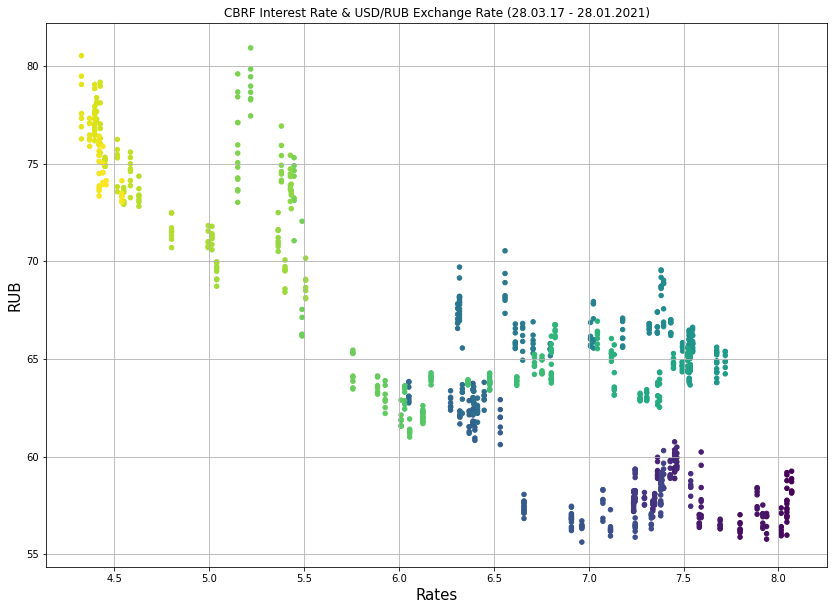

In [26]:
ax = df.plot.scatter(x='Rates', y='Close', c=df.index, cmap='viridis', figsize=(14,10))

ax.set_xlabel('Rates', fontsize=15)
ax.set_ylabel("RUB", fontsize=15)
ax.set_title('CBRF Interest Rate & USD/RUB Exchange Rate (28.03.17 - 28.01.2021)')

ax.grid(True)

plt.savefig("correlation.jpeg")

In [27]:
# calculate correlation without shift
sum_corr = df.corr().sum().sort_values(ascending=True).index.values
df[sum_corr].corr()

,Close,Rates
Close,1.000000,-0.802712
Rates,-0.802712,1.000000


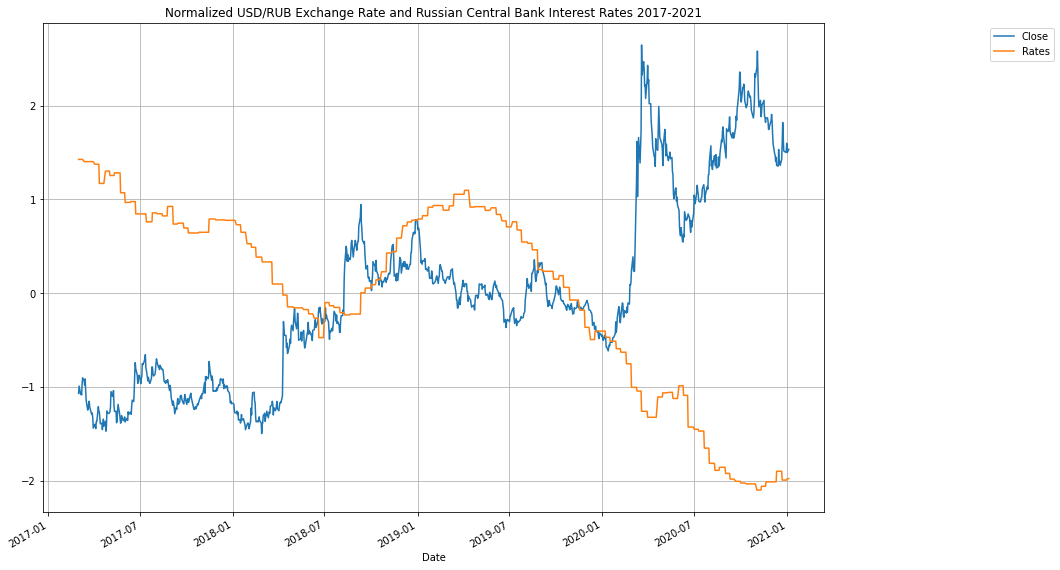

In [28]:
normalize = True
log_plot = False
title = "Normalized USD/RUB Exchange Rate and Russian Central Bank Interest Rates 2017-2021"

plot_data(df, normalize, log_plot,title)

#### Direct Investment in Russia and the USD/RUB Exchange Rate

Data Source:
https://www.cbr.ru/vfs/eng/statistics/credit_statistics/direct_investment/21e-dir_inv.xlsx


#### Hypothesis (I wrote this before running the analysis):

DI will have a positive correlation with USD/RUB exchange rate 

when USD/RUB % change == +  =>  capital inflow is + 

Yes, as the exchange rate goes up, it becomes more expensive for investors to buy 
rubles, however, as the exchange rate goes up, so does confidence in the 
russian economy. 

Logically however, the correlation would be inverse, because investors get a better 
deal on Russian assets when the Ruble is weaker to the dollar. 



In [29]:
import requests
import pandas as pd

In [30]:
url = 'https://www.cbr.ru/vfs/eng/statistics/credit_statistics/direct_investment/21e-dir_inv.xlsx'
r = requests.get(url)
open('dir_inv.xls', 'wb').write(r.content)
df1 = pd.read_excel('dir_inv.xls')

In [31]:
df1

,Direct Investment of the Russian Federation by Institutional Sector,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,(Balance of Payments Transactions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(millions of US dollars),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Q1 1994,Q2 1994,Q3 1994,Q4 1994,1994,Q1 1995,Q2 1995,Q3 1995,Q4 1995,...,Q1 2020,Q2 2020,Q3 2020,Q4 2020,2020.000000,Q1 2021,Q2 2021,Q3 2021,Q4 2021,2021.000000
4,Direct investment,-66.95455,-50.6787,-51.5994,-209.3712,-378.60385,-69.52675,-113.6062,-456.94645,-819.8606,...,4377.27375,-1618.091527,-5411.231332,-979.762267,-3631.815775,3182.8281,3288.602271,4218.278419,14673.099443,25362.808233
5,Abroad,74.9835,72.27325,72.214,91.499,310.96975,129.5546,186.3214,184.48605,105.4214,...,617.796134,4638.900254,-2977.25325,3567.555126,5846.998141,9113.12065,8705.566513,20264.09096,27106.148991,65188.927114
6,General government,0,0,0,0,0,-,-,-,-,...,0,0,0,0,0.000000,0,0,0,0,0.000000
7,Equity capital,0,0,0,0,0,-,-,-,-,...,0,0,0,0,0.000000,0,0,0,0,0.000000
8,Banks,1.6735,1.96325,0.904,14.189,18.72975,1.5546,58.3214,4.48605,-22.5786,...,251.217927,-189.048574,-125.207686,245.137608,182.099275,107.470383,-199.191608,434.6187,261.048644,603.946119
9,Equity capital,1.6735,1.96325,0.904,14.189,18.72975,1.5546,58.3214,4.48605,-22.5786,...,40.366172,15.860747,103.670916,15.991693,175.889528,-53.543969,-89.769397,53.346742,-4.497766,-94.464390


In [32]:
df = pd.DataFrame()
df["Date"] = df1.iloc[3]
df["DI"] = df1.iloc[4]

df = df.reset_index(drop=True)

In [33]:
df.drop(df.index[0::5], axis=0, inplace=True)

In [34]:
df['Datetime'] = pd.date_range(start='01-01-1994', periods=len(df), freq="Q")
df.set_index("Datetime", inplace = True)

#### Quarterly Change in Direct Investment in Russia

<AxesSubplot:xlabel='Datetime'>

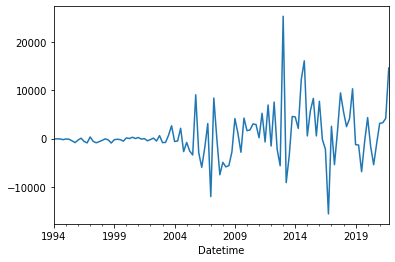

In [35]:
df["DI"].plot()

#### Total Investment Over Time


Integral of Direct Investment => Total Investment Over Time

not adjusted for inflation

<AxesSubplot:xlabel='Datetime'>

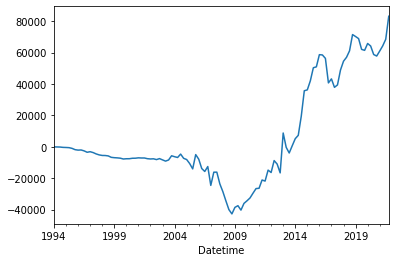

In [36]:
df["TotalDI"] = df["DI"].cumsum()
df["TotalDI"].plot()

In [37]:
# download USD/Ruble Historical Data
df1 = yf.download("RUB=X", start="1994-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [38]:
df = df.loc["2003-06-30"::]

In [39]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,29.730000,29.730000,29.690001,29.700001,29.700001,0
2003-12-02,29.690001,29.700001,29.690001,29.690001,29.690001,0
2003-12-03,29.690001,29.690001,29.690001,29.690001,29.690001,0
2003-12-04,29.680000,29.680000,29.680000,29.680000,29.680000,0
2003-12-05,29.629999,29.629999,29.629999,29.620001,29.620001,0


In [40]:
df['DI'] = df['DI'].astype(float)

In [41]:
# original array:
x = df1["Close"]

# set resample ratio:
resample_ratio = len(df) / len(df1)

# resample array:
y = zoom(x, resample_ratio, order=0)

In [42]:
# sanity check
print(len(y))
print(len(df))

75
75


In [43]:
df = pd.DataFrame({'index': df.index, 'RUB Close': y, 'DI': df.DI}) #, 'Brent % change': df1.Return})

In [44]:
df["TotalDI"] = df["DI"].cumsum()

In [45]:
df = df.drop(['index','DI'], axis=1)

In [46]:
df

,RUB Close,TotalDI
Datetime,,
2003-06-30,29.700001,-777.634700
2003-09-30,28.520000,-60.397500
2003-12-31,29.012800,2621.727700
2004-03-31,29.219999,2029.632800
2004-06-30,28.150000,1543.125800
...,...,...
2020-12-31,73.929802,66180.117664
2021-03-31,76.014198,69362.945764
2021-06-30,74.253197,72651.548035


#### Direct Investment & USD/RUB Exchange Rate 30.06.2003 - 31.12.2021 - Correlation (0.933098)

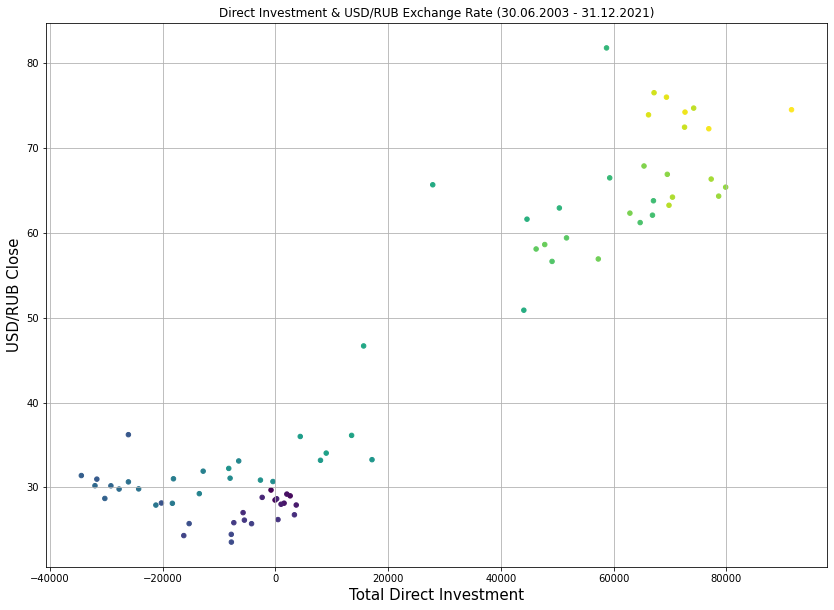

In [47]:
ax = df.plot.scatter(x='TotalDI', y='RUB Close', c=df.index, cmap='viridis', figsize=(14,10))

ax.set_xlabel('Total Direct Investment', fontsize=15)
ax.set_ylabel("USD/RUB Close", fontsize=15)
ax.set_title('Direct Investment & USD/RUB Exchange Rate (30.06.2003 - 31.12.2021)')

ax.grid(True)
plt.savefig("DI&RUB.jpeg")

In [48]:
# calculate correlation without shift
sum_corr = df.corr().sum().sort_values(ascending=True).index.values
df[sum_corr].corr()

,RUB Close,TotalDI
RUB Close,1.000000,0.933098
TotalDI,0.933098,1.000000


#### Normalized USD/RUB Exchange Rate and Total Direct Investment in Russia

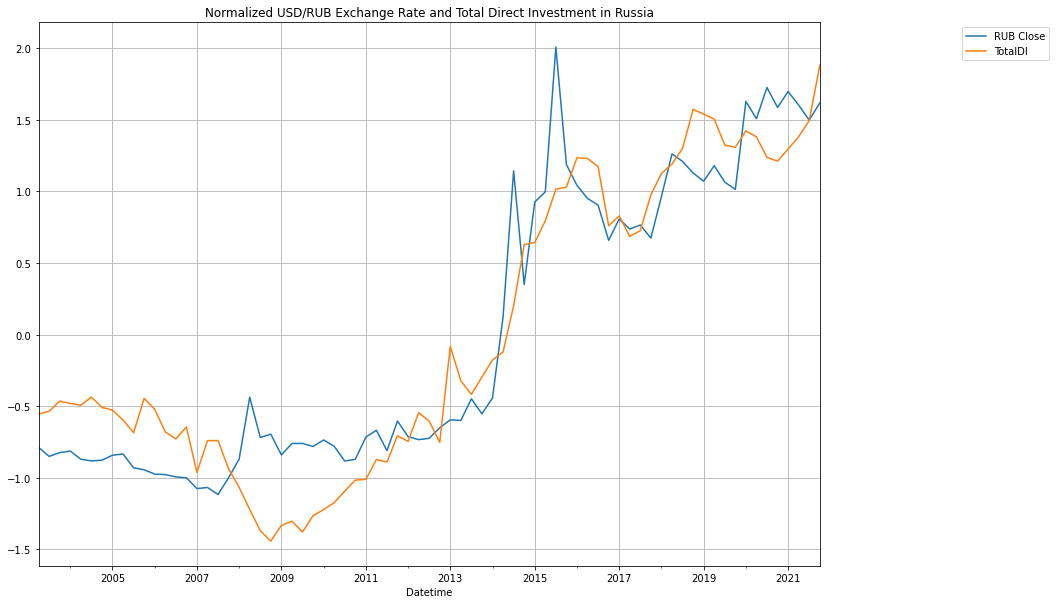

In [49]:
normalize = True
log_plot = False
title = "Normalized USD/RUB Exchange Rate and Total Direct Investment in Russia"

plot_data(df, normalize, log_plot,title)

In [50]:
df

,RUB Close,TotalDI
Datetime,,
2003-06-30,29.700001,-777.634700
2003-09-30,28.520000,-60.397500
2003-12-31,29.012800,2621.727700
2004-03-31,29.219999,2029.632800
2004-06-30,28.150000,1543.125800
...,...,...
2020-12-31,73.929802,66180.117664
2021-03-31,76.014198,69362.945764
2021-06-30,74.253197,72651.548035


In [51]:
# Calculate the difference in days between two dates
from datetime import datetime

def diff_date(d1, d2):
    return (d2.year - d1.year) * 365 + d2.day - d1.day

diff_date(datetime(2009,6,30),datetime(2016,1,1))

2526